In [1]:
import pickle

from tqdm.notebook import tqdm_notebook as tqdm

from notebook_utils.constants import PROJ_ROOT, NEW_GENRES
from notebook_utils.feature_reduction import FeatureReducer
from notebook_utils.map_to_roget import make_clean_model_df, RogetMapper
from notebook_utils.predictions import Predictor

tqdm.pandas()

fr = FeatureReducer(general=True)
p = Predictor(loader=fr.loader)
rm = RogetMapper(p)

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
c:\python37\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Show Loaded Data

In [2]:
fr.loader.show_model_df("Unigram")

Book #,@Genre,first_1k,@Outcome
10368,Adventure_Stories,i was on a french steamer bound from havre to new york when i had a peculiar experience in the way o...,FAILURE
12190,Adventure_Stories,an introductory disaster early in the spring of the year 1884 the threemasted schooner castor from s...,FAILURE
13290,Adventure_Stories,editors note martin rattler was one of robert michael ballantynes early books born at edinburgh in 1...,FAILURE
...,...,...,...
29948,Short_Stories,experiment the first time machine gentlemen professor johnson proudly informed his two colleagues tr...,SUCCESSFUL
3815,Short_Stories,o henry afritechef of all delight of all delectables conglomerate that stay the starved brain and re...,SUCCESSFUL
8129,Short_Stories,preface poltarnees beholder of ocean blagdaross the madness of andelsprutz where the tides ebb and f...,SUCCESSFUL


In [3]:
fr.loader.show_model_df("Roget")

Book #,@Genre,vehicle,ship,circumscription,...,numbness,analogy,zoology,inodorousness,@Outcome
10368,Adventure_Stories,0.351899,0.079800,0.346154,...,0.0,0.000000,0.0,0.0,FAILURE
12190,Adventure_Stories,0.541772,0.172070,0.076923,...,0.0,0.000000,0.0,0.0,FAILURE
13290,Adventure_Stories,0.524051,0.229426,0.153846,...,0.0,0.000000,0.0,0.0,FAILURE
15072,Adventure_Stories,0.521519,0.127182,0.000000,...,0.0,0.000000,0.0,0.0,FAILURE
18399,Adventure_Stories,0.334177,0.291771,0.076923,...,0.0,0.000000,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.098734,0.077307,0.038462,...,0.0,0.000000,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.415190,0.201995,0.230769,...,0.0,0.037037,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.025316,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.470886,0.072319,0.192308,...,0.0,0.000000,0.0,0.0,SUCCESSFUL


In [4]:
fr.loader.show_model_df("WordNet")

Book #,@Genre,be,exist,equal,...,agua,ditch_reed,tax-exempt,marmorean,@Outcome
10368,Adventure_Stories,0.52065,0.540626,0.516462,...,0.0,0.0,0.0,0.0,FAILURE
12190,Adventure_Stories,0.38635,0.385256,0.382785,...,0.0,0.0,0.0,0.0,FAILURE
13290,Adventure_Stories,0.33830,0.340071,0.336771,...,0.0,0.0,0.0,0.0,FAILURE
15072,Adventure_Stories,0.25300,0.251685,0.250298,...,0.0,0.0,0.0,0.0,FAILURE
18399,Adventure_Stories,0.29720,0.296869,0.295518,...,0.0,0.0,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.11935,0.124455,0.119000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.23260,0.234641,0.232051,...,0.0,0.0,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.00525,0.005549,0.005157,...,0.0,0.0,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.21695,0.219580,0.214994,...,1.0,1.0,0.0,0.0,SUCCESSFUL


# Train and Reduce Models

### WordNet

In [5]:
wordnet_acc, wordnet_weights = p.predict_success(fr.loader.wordnet_df_scaled, "WordNet", disp_weights=False)

Genre,Accuracy
Adventure_Stories,0.740000
Fiction,0.700000
Historical_Fiction,0.640000
Love_Stories,0.767368
Mystery,0.730000
Poetry,0.744211
Science_Fiction,0.530000
Short_Stories,0.770000
Average,0.702697


In [6]:
wn_exh, wn_rw = fr.reduce_features(wordnet_weights, "WordNet", max_steps=15, og_acc=wordnet_acc)

Adventure_Stories exhausted at 8.75 deviations above the mean
Fiction exhausted at 7.0 deviations above the mean
Historical_Fiction exhausted at 7.75 deviations above the mean
Love_Stories exhausted at 8.25 deviations above the mean
Mystery exhausted at 8.0 deviations above the mean
Poetry exhausted at 9.75 deviations above the mean
Science_Fiction exhausted at 11.0 deviations above the mean
Short_Stories exhausted at 12.0 deviations above the mean



### Roget

In [7]:
roget_acc, roget_weights = p.predict_success(fr.loader.roget_df_scaled, "Roget", disp_weights=False)

Genre,Accuracy
Adventure_Stories,0.783684
Fiction,0.680000
Historical_Fiction,0.570000
Love_Stories,0.666842
Mystery,0.710000
Poetry,0.715263
Science_Fiction,0.620000
Short_Stories,0.730000
Average,0.684474


In [8]:
roget_exh, roget_rw = fr.reduce_features(roget_weights, "Roget", og_acc=roget_acc)

Adventure_Stories exhausted at 4.25 deviations above the mean
Fiction exhausted at 3.5 deviations above the mean
Historical_Fiction exhausted at 3.25 deviations above the mean
Love_Stories exhausted at 3.75 deviations above the mean
Mystery exhausted at 3.5 deviations above the mean
Poetry exhausted at 4.0 deviations above the mean
Science_Fiction exhausted at 3.75 deviations above the mean
Short_Stories exhausted at 4.0 deviations above the mean



# Mapping to Roget Sections

## Mapping WordNet (Not Reduced)

In [9]:
wn_df = make_clean_model_df(fr.loader.wordnet_data)

In [10]:
wn_set = {genre: wn_df[wn_df["@Genre"] == genre] for genre in NEW_GENRES}

In [11]:
NumsAndOutcomes = {genre: wn_df[wn_df["@Genre"] == genre][["Book #", "@Genre", "@Outcome"]].reset_index(drop=True) for genre in NEW_GENRES}

In [12]:
wn_to_rocat = pickle.load(open(str(PROJ_ROOT.joinpath("data", "wn_to_rocat.txt")), "rb+"))

In [13]:
wn_to_rocat_no_scale, wn_to_rocat_scaled = rm.concat_map_to_roget(wn_to_rocat, "WordNet", "Category", NumsAndOutcomes)

In [14]:
wn_to_rosect_no_scale, wn_to_rosect_scaled = rm.map_to_roget(wn_to_rocat_no_scale, "WordNet", NumsAndOutcomes, to_sections=True)

### Test and Reduce Success Prediction for WordNet to Roget Sections

In [15]:
full_wn_to_rosect_acc, full_wn_to_rosect_weights, wn_to_rosect_acc, wn_to_rosect_weights = rm.test_map_to_roget(wn_to_rosect_no_scale, wn_to_rosect_scaled,
                                                                                                             src_model="WordNet", map_to="Section")

Genre,Accuracy
Adventure_Stories,0.596316
Fiction,0.620000
Historical_Fiction,0.540000
Love_Stories,0.523158
Mystery,0.520000
Poetry,0.651579
Science_Fiction,0.490000
Short_Stories,0.670000
Average,0.576382


Genre,Accuracy
Adventure_Stories,0.596316
Fiction,0.660000
Historical_Fiction,0.560000
Love_Stories,0.533684
Mystery,0.560000
Poetry,0.653158
Science_Fiction,0.560000
Short_Stories,0.680000
Average,0.600395


In [16]:
wn_to_rosect_df = rm.scale_mapped(wn_to_rosect_no_scale)
wn_to_rosect_exh, wn_to_rosect_rw = fr.reduce_features(full_wn_to_rosect_weights, "WordNet to Roget Section",
                                                    model_df=wn_to_rosect_df, og_acc=full_wn_to_rosect_acc)

Adventure_Stories exhausted at 1.0 deviations above the mean
Fiction exhausted at 1.25 deviations above the mean
Historical_Fiction exhausted at 1.25 deviations above the mean
Love_Stories exhausted at 1.0 deviations above the mean
Mystery exhausted at 1.25 deviations above the mean
Poetry exhausted at 1.25 deviations above the mean
Science_Fiction exhausted at 0.5 deviations above the mean
Short_Stories exhausted at 0.75 deviations above the mean



Genre,Deviations,Accuracy,Num Features
Adventure_Stories,0.250,0.606316,12.00
Fiction,1.000,0.640000,5.00
Historical_Fiction,1.000,0.560000,6.00
Love_Stories,0.500,0.583684,7.00
Mystery,1.000,0.570000,6.00
Poetry,0.750,0.671579,8.00
Science_Fiction,0.000,0.510000,11.00
Short_Stories,0.500,0.680000,11.00
Average,0.625,0.602697,8.25


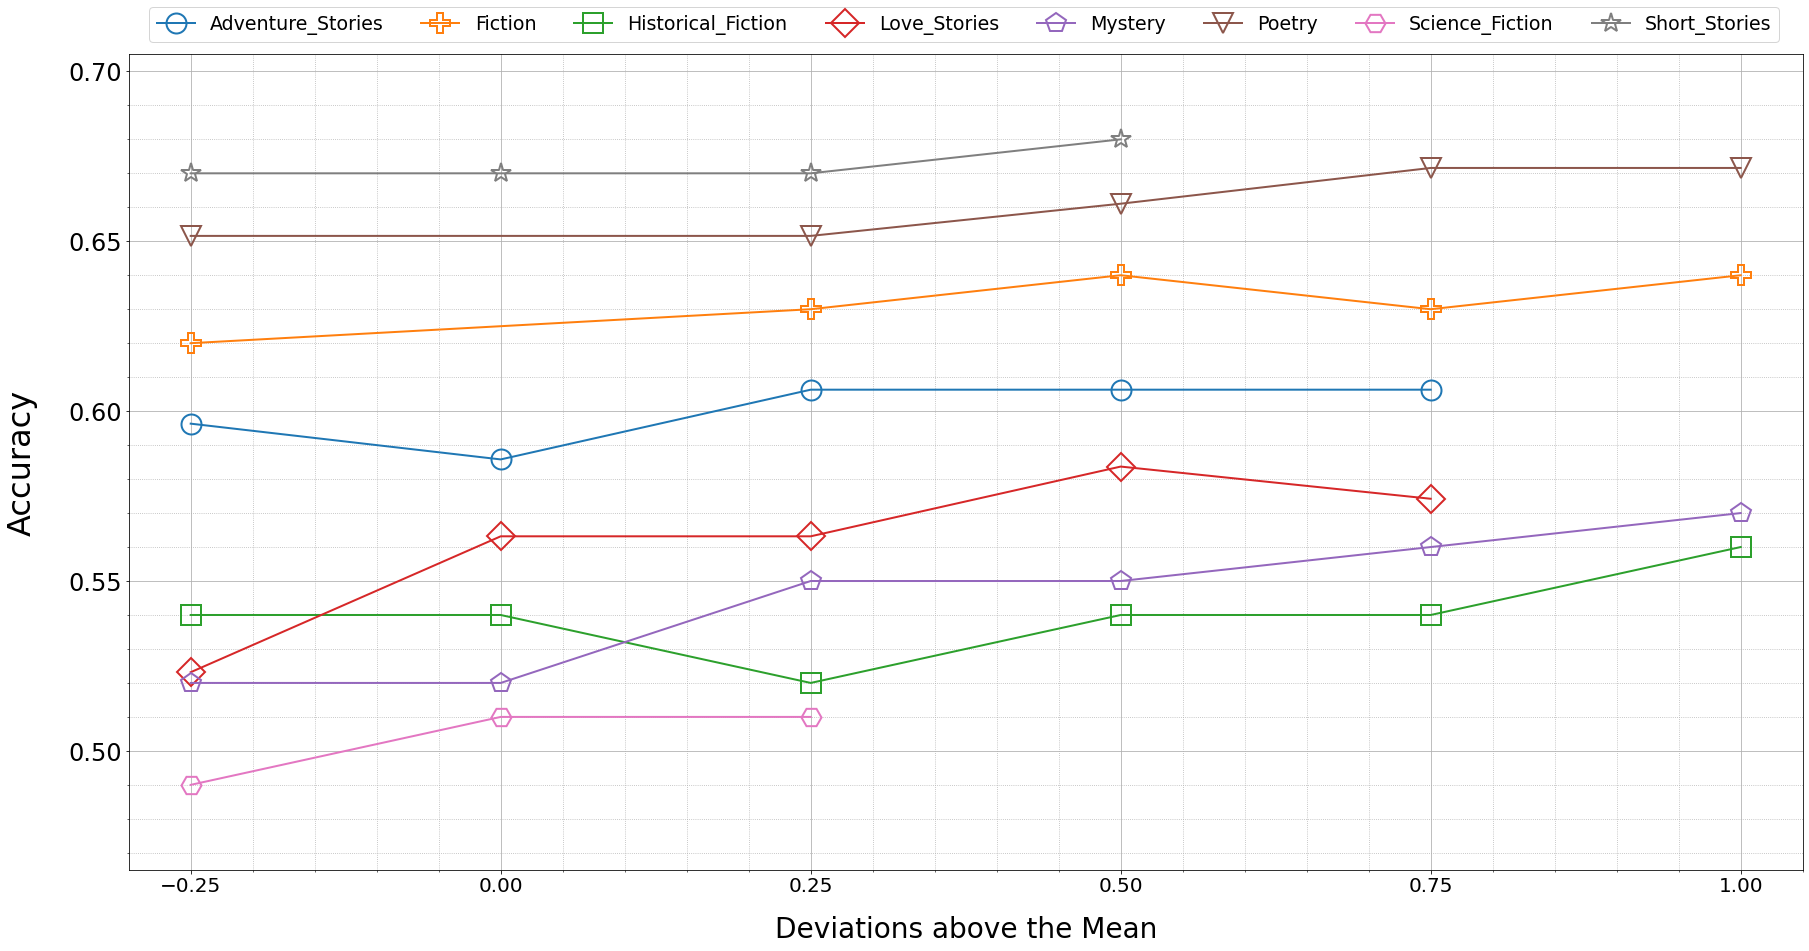

In [17]:
wn_to_rosect_reduced_acc = fr.reduce_features(wn_to_rosect_exh, markersize=20)

## Mapping Roget Categories (Not Reduced)

In [18]:
roget_df = make_clean_model_df(fr.loader.roget_data)

In [19]:
roget_set = {genre: roget_df[roget_df["@Genre"] == genre] for genre in NEW_GENRES}

In [20]:
roget_to_rosect = pickle.load(open(str(PROJ_ROOT.joinpath("data", "roget_to_rosect.txt")), "rb+"))

In [21]:
rosect_no_scale, rosect_scaled = rm.concat_map_to_roget(roget_to_rosect, "Roget", "Section", NumsAndOutcomes)

### Test and Reduce Success Prediction for Roget Categories to Roget Sections

In [22]:
full_rosect_acc, full_rosect_weights, rosect_acc, rosect_weights = rm.test_map_to_roget(rosect_no_scale, rosect_scaled, src_model="Roget", map_to="Section")

Genre,Accuracy
Adventure_Stories,0.697368
Fiction,0.590000
Historical_Fiction,0.550000
Love_Stories,0.575263
Mystery,0.580000
Poetry,0.611053
Science_Fiction,0.520000
Short_Stories,0.680000
Average,0.600461


Genre,Accuracy
Adventure_Stories,0.707895
Fiction,0.580000
Historical_Fiction,0.560000
Love_Stories,0.575263
Mystery,0.580000
Poetry,0.611579
Science_Fiction,0.520000
Short_Stories,0.650000
Average,0.598092


In [23]:
rosect_df = rm.scale_mapped(rosect_no_scale)
rosect_exh, rosect_rw = fr.reduce_features(full_rosect_weights, "Roget to Roget Section",
                                        model_df=rosect_df, og_acc=full_rosect_acc)

Adventure_Stories exhausted at 1.5 deviations above the mean
Fiction exhausted at 1.25 deviations above the mean
Historical_Fiction exhausted at 1.25 deviations above the mean
Love_Stories exhausted at 1.25 deviations above the mean
Mystery exhausted at 1.5 deviations above the mean
Poetry exhausted at 1.0 deviations above the mean
Science_Fiction exhausted at 1.0 deviations above the mean
Short_Stories exhausted at 1.0 deviations above the mean



Genre,Deviations,Accuracy,Num Features
Adventure_Stories,1.00000,0.717895,6.000
Fiction,0.25000,0.610000,17.000
Historical_Fiction,0.75000,0.620000,10.000
Love_Stories,0.25000,0.594737,18.000
Mystery,0.00000,0.590000,22.000
Poetry,0.75000,0.631053,8.000
Science_Fiction,-0.25000,0.520000,23.000
Short_Stories,0.50000,0.690000,9.000
Average,0.40625,0.621711,14.125


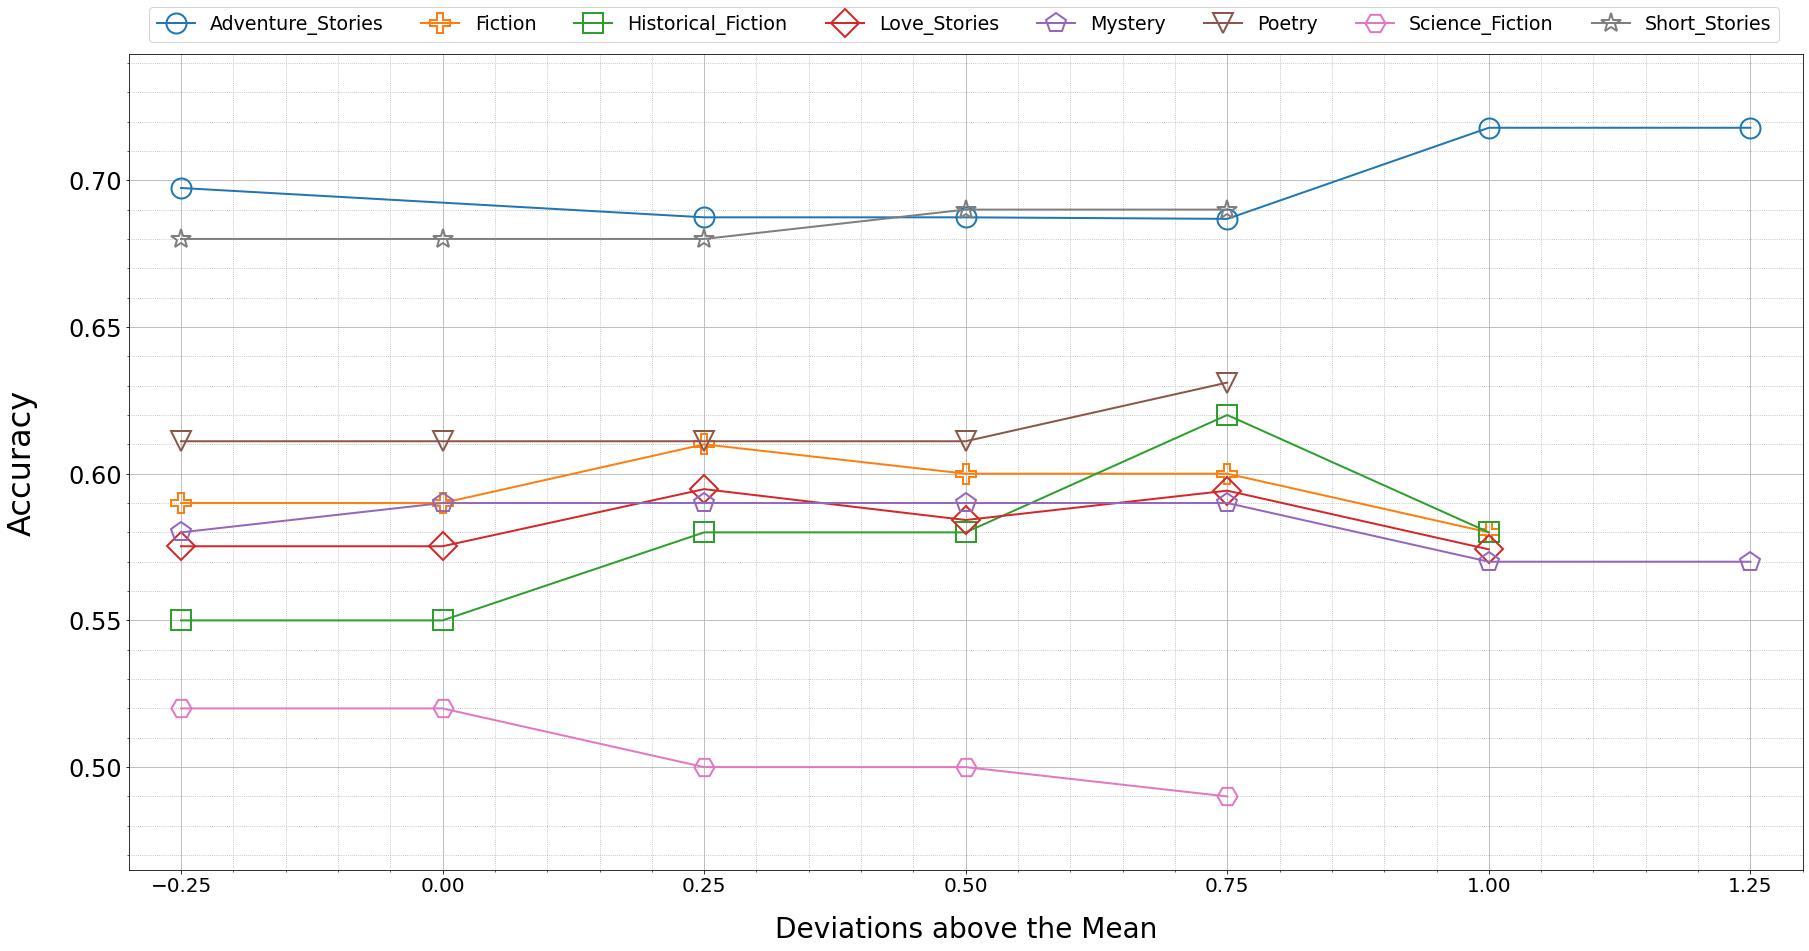

In [24]:
rosect_reduced_acc = fr.reduce_features(rosect_exh, markersize=20)

## Mapping WordNet (Reduced)

In [25]:
wnrf_set = {genre: wn_df[wn_df["@Genre"] == genre][["Book #", "@Genre"] + [w for w in wn_rw[genre]["Feature"]] + ["@Outcome"]] for genre in NEW_GENRES}

In [36]:
wnrf_to_rocat_no_scale, wnrf_to_rocat_scaled = rm.map_to_roget(wnrf_set, "WordNet", NumsAndOutcomes, to_categories=True)

In [27]:
wnrf_to_rosect_no_scale, wnrf_to_rosect_scaled = rm.map_to_roget(wnrf_to_rocat_no_scale, "WordNet", NumsAndOutcomes, to_sections=True)

### Test and Reduce Success Prediction for WordNet to Roget Sections

In [28]:
full_wnrf_to_rosect_acc, full_wnrf_to_rosect_weights, wnrf_to_rosect_acc, wnrf_to_rosect_weights = rm.test_map_to_roget(wnrf_to_rosect_no_scale,
                                                                                                                     wnrf_to_rosect_scaled, src_model="WordNet",
                                                                                                                     map_to="Section")

Genre,Accuracy
Adventure_Stories,0.762105
Fiction,0.690000
Historical_Fiction,0.590000
Love_Stories,0.705789
Mystery,0.640000
Poetry,0.702632
Science_Fiction,0.510000
Short_Stories,0.680000
Average,0.660066


Genre,Accuracy
Adventure_Stories,0.762105
Fiction,0.690000
Historical_Fiction,0.720000
Love_Stories,0.796316
Mystery,0.710000
Poetry,0.693158
Science_Fiction,0.710000
Short_Stories,0.720000
Average,0.725197


In [29]:
wnrf_to_rosect_df = rm.scale_mapped(wnrf_to_rosect_no_scale)
wnrf_to_rosect_exh, wnrf_to_rosect_rw = fr.reduce_features(full_wnrf_to_rosect_weights, "WordNet to Roget Section",
                                                        model_df=wnrf_to_rosect_df, og_acc=full_wnrf_to_rosect_acc)

Adventure_Stories exhausted at 1.25 deviations above the mean
Fiction exhausted at 1.0 deviations above the mean
Historical_Fiction exhausted at 1.75 deviations above the mean
Love_Stories exhausted at 1.0 deviations above the mean
Mystery exhausted at 1.25 deviations above the mean
Poetry exhausted at 1.25 deviations above the mean
Science_Fiction exhausted at 0.5 deviations above the mean
Short_Stories exhausted at 1.25 deviations above the mean



Genre,Deviations,Accuracy,Num Features
Adventure_Stories,0.500,0.772632,11.00
Fiction,0.750,0.720000,7.00
Historical_Fiction,-0.250,0.590000,23.00
Love_Stories,-0.250,0.705789,23.00
Mystery,1.000,0.710000,7.00
Poetry,0.750,0.712105,8.00
Science_Fiction,0.000,0.520000,13.00
Short_Stories,0.500,0.700000,14.00
Average,0.375,0.678816,13.25


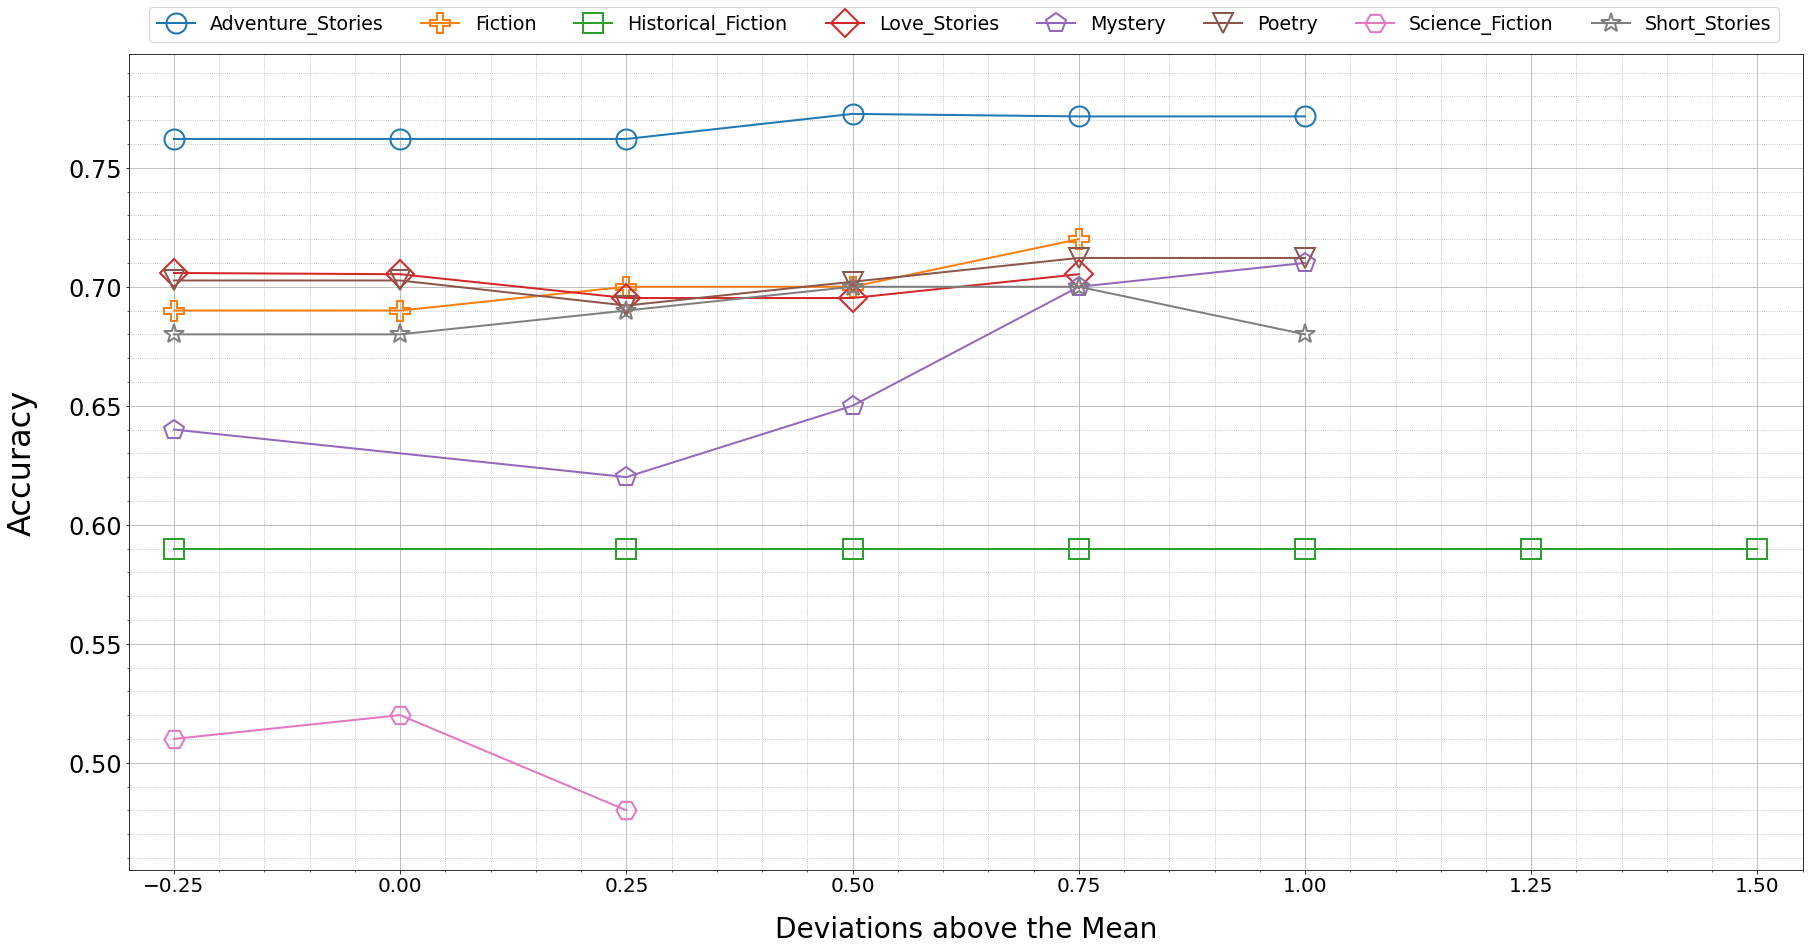

In [30]:
wnrf_to_rosect_reduced_acc = fr.reduce_features(wnrf_to_rosect_exh, markersize=20)

## Mapping Roget Categories (Reduced)

In [31]:
roget_rf_set = {genre: roget_df[roget_df["@Genre"] == genre][["Book #", "@Genre"] + [w for w in roget_rw[genre]["Feature"]] + ["@Outcome"]] for genre in NEW_GENRES}

In [32]:
rosect_rf_no_scale, rosect_rf_scaled = rm.map_to_roget(roget_rf_set, "Roget", NumsAndOutcomes, to_sections=True)

### Test and Reduce Success Prediction for Roget Categories to Roget Sections

In [33]:
full_rosect_rf_acc, full_rosect_rf_weights, rosect_rf_acc, rosect_rf_weights = rm.test_map_to_roget(rosect_rf_no_scale, rosect_rf_scaled,
                                                                                                 src_model="Roget", map_to="Section")

Genre,Accuracy
Adventure_Stories,0.750526
Fiction,0.760000
Historical_Fiction,0.670000
Love_Stories,0.776316
Mystery,0.720000
Poetry,0.548947
Science_Fiction,0.610000
Short_Stories,0.700000
Average,0.691974


Genre,Accuracy
Adventure_Stories,0.730000
Fiction,0.810000
Historical_Fiction,0.730000
Love_Stories,0.766842
Mystery,0.740000
Poetry,0.835263
Science_Fiction,0.720000
Short_Stories,0.690000
Average,0.752763


In [34]:
rosect_rf_df = rm.scale_mapped(rosect_rf_no_scale)
rosect_rf_exh, rosect_rf_rw = fr.reduce_features(rosect_rf_weights, "Roget Section", model_df=rosect_rf_df, og_acc=rosect_rf_acc)

Adventure_Stories exhausted at 1.5 deviations above the mean
Fiction exhausted at 1.25 deviations above the mean
Historical_Fiction exhausted at 1.5 deviations above the mean
Love_Stories exhausted at 1.25 deviations above the mean
Mystery exhausted at 1.25 deviations above the mean
Poetry exhausted at 1.0 deviations above the mean
Science_Fiction exhausted at 1.25 deviations above the mean
Short_Stories exhausted at 1.25 deviations above the mean



Genre,Deviations,Accuracy,Num Features
Adventure_Stories,0.7500,0.781579,11.000
Fiction,-0.2500,0.810000,22.000
Historical_Fiction,-0.2500,0.730000,20.000
Love_Stories,1.0000,0.787368,8.000
Mystery,0.5000,0.770000,16.000
Poetry,-0.2500,0.835263,18.000
Science_Fiction,-0.2500,0.720000,23.000
Short_Stories,0.2500,0.720000,17.000
Average,0.1875,0.769276,16.875


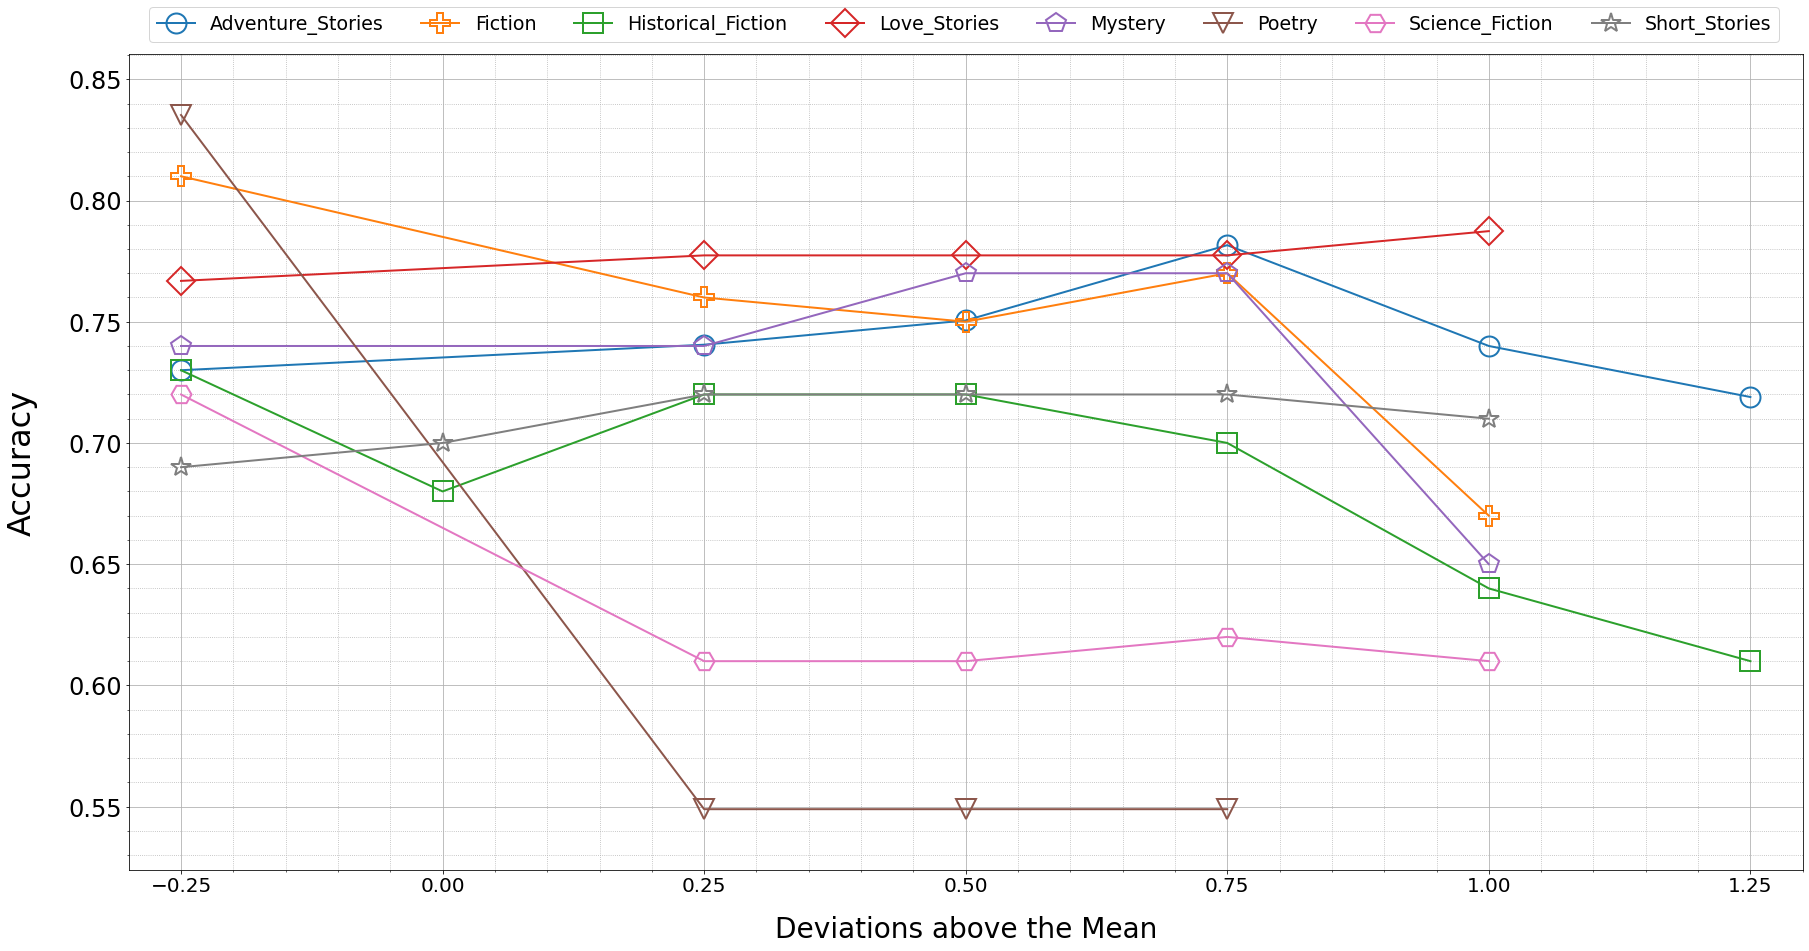

In [35]:
rosect_rf_reduced_acc = fr.reduce_features(rosect_rf_exh, markersize=20)